In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [25]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


Сразу переведем столбец "Дата" в правильный формат

In [26]:
df['Дата'] = pd.to_datetime(df['Дата'])


In [27]:
df.dtypes


Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object

Сгруппируйте данные по дате, посчитайте количество продаж

In [28]:
grouped_df = (
    df
    .groupby('Дата', as_index=False)
    .agg({'Количество': 'sum'})
)


Вывести несколько первых строк сгруппированных данных

In [29]:
grouped_df.head()


,Дата,Количество
0,2018-01-04,3734
1,2018-01-05,3643
2,2018-01-06,3193
3,2018-01-07,3298
4,2018-01-09,4055


Нарисуйте график продаж у `grouped_df`

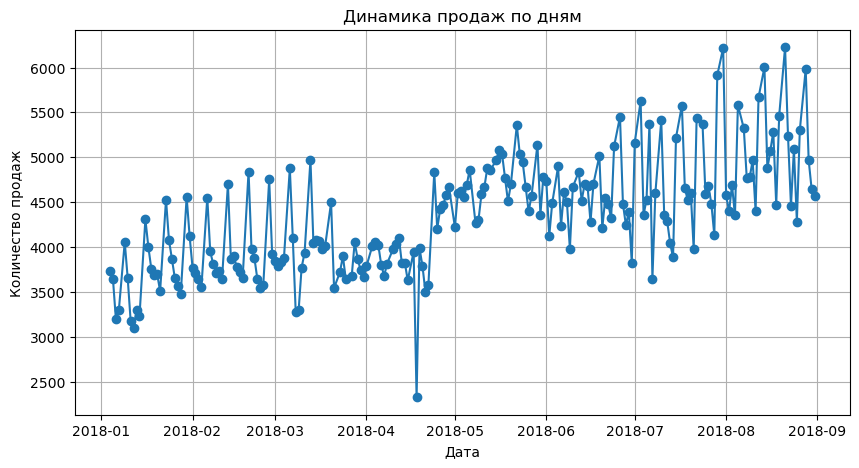

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(grouped_df['Дата'], grouped_df['Количество'], marker='o')
plt.title('Динамика продаж по дням')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.grid(True)
plt.show()


Опишите что вы видите на графике. Ваша задача - максимально описать график

На графике показана динамика общего объёма продаж по дням.
По оси X указаны даты, по оси Y — суммарное количество проданных товаров.
Объём продаж меняется неравномерно: в одни дни он выше, в другие — ниже.
Резких выбросов или аномалий на графике не наблюдается.
График позволяет оценить общую картину продаж и выявить дни с повышенной и пониженной активностью.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [31]:
df.sort_values(by='Количество', ascending=False).head(1)


,Дата,Склад,Контрагент,Номенклатура,Количество
218822,2018-06-28,1,address_208,product_0,200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [32]:
df_filtered = df[df['Склад'] == 3]

df_filtered = df_filtered[df_filtered['Дата'].dt.month.isin([6, 7, 8])]

df_filtered = df_filtered[df_filtered['Дата'].dt.weekday == 2]

product_sales = (
    df_filtered
    .groupby('Номенклатура', as_index=False)
    .agg({'Количество': 'sum'})
)

top_product = product_sales.sort_values(
    by='Количество', ascending=False
).head(1)

top_product


,Номенклатура,Количество
1,product_1,2267


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt


In [34]:
import os
os.getcwd()


'C:\\Users\\Gulnur'

"C:\Users\Gulnur\Desktop\weather_2018.csv"

In [35]:
weather = pd.read_csv(
    r"C:\Users\Gulnur\Desktop\weather_2018.csv",
    sep=';',
    encoding='cp1251',
    skiprows=6
)


In [36]:
weather.head()


,Местное время в Астане,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
31.01.2018 23:00,-14.8,738.1,772.9,0.0,67,"Штиль, безветрие",0,NaN,NaN,40%.,...,Перистые когтевидные или нитевидные или первые...,NaN,-19.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31.01.2018 20:00,-10.5,738.1,772.2,-0.5,51,"Ветер, дующий с юго-юго-востока",1,NaN,NaN,100%.,...,Перистые когтевидные или нитевидные или первые...,NaN,-18.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31.01.2018 17:00,-9.4,738.6,772.6,-0.9,50,"Ветер, дующий с юго-востока",1,NaN,NaN,60%.,...,"Перистые нитевидные, иногда когтевидные, не ра...",10.0,-17.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31.01.2018 14:00,-8.2,739.5,773.4,-1.0,44,"Ветер, дующий с востоко-юго-востока",2,NaN,NaN,100%.,...,"Перистые нитевидные, иногда когтевидные, не ра...",10.0,-18.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31.01.2018 11:00,-9.4,740.5,774.7,-1.7,41,"Ветер, дующий с востока",1,NaN,NaN,100%.,...,Перистые когтевидные или нитевидные или первые...,10.0,-20.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
weather['Дата'] = pd.to_datetime(
    weather['Местное время в Астане'],
    format='%d.%m.%Y %H:%M',
    errors='coerce'
).dt.date


In [38]:
weather[['Местное время в Астане', 'Дата']].head()


,Местное время в Астане,Дата
31.01.2018 23:00,-14.8,NaT
31.01.2018 20:00,-10.5,NaT
31.01.2018 17:00,-9.4,NaT
31.01.2018 14:00,-8.2,NaT
31.01.2018 11:00,-9.4,NaT


In [39]:
weather = weather.reset_index()


In [40]:
weather.columns


Index(['index', 'Местное время в Астане', 'T', 'Po', 'P', 'Pa', 'U', 'DD',
       'Ff', 'ff10', 'ff3', 'N', 'WW', 'W1', 'W2', 'Tn', 'Tx', 'Cl', 'Nh', 'H',
       'Cm', 'Ch', 'VV', 'Td', 'RRR', 'tR', 'E', 'Tg', 'E'', 'sss', 'Дата'],
      dtype='object')

In [41]:
weather = weather.drop(columns=['Дата'], errors='ignore')


In [42]:
weather = weather.reset_index()


In [43]:
weather['Дата'] = pd.to_datetime(
    weather['index'],
    format='%d.%m.%Y %H:%M',
    errors='coerce'
).dt.date


In [44]:
weather[['index', 'Дата']].head()


,index,Дата
0,31.01.2018 23:00,2018-01-31
1,31.01.2018 20:00,2018-01-31
2,31.01.2018 17:00,2018-01-31
3,31.01.2018 14:00,2018-01-31
4,31.01.2018 11:00,2018-01-31


In [45]:
daily_temp = (
    weather
    .groupby('Дата', as_index=False)['T']
    .mean()
    .rename(columns={'T': 'Температура'})
)

daily_temp.head()


,Дата,Температура
0,2018-01-01,747.9000
1,2018-01-02,745.3000
2,2018-01-03,742.7000
3,2018-01-04,744.6625
4,2018-01-05,745.3000


In [ ]:
grouped_df.head()


In [47]:
grouped_df = (
    df
    .groupby('Дата', as_index=False)
    .agg({'Количество': 'sum'})
)

grouped_df.head()


,Дата,Количество
0,2018-01-04,3734
1,2018-01-05,3643
2,2018-01-06,3193
3,2018-01-07,3298
4,2018-01-09,4055


In [48]:
daily_temp = (
    weather
    .groupby('Дата', as_index=False)['T']
    .mean()
    .rename(columns={'T': 'Температура'})
)

daily_temp.head()


,Дата,Температура
0,2018-01-01,747.9000
1,2018-01-02,745.3000
2,2018-01-03,742.7000
3,2018-01-04,744.6625
4,2018-01-05,745.3000


In [49]:
weather['T'] = (
    weather['T']
    .astype(str)
    .str.replace(',', '.', regex=False)
    .astype(float)
)


In [50]:
weather['T'].describe()


count    248.000000
mean     744.210081
std        8.181767
min      719.300000
25%      739.800000
50%      743.600000
75%      748.650000
max      759.700000
Name: T, dtype: float64

In [51]:
weather.head()


,level_0,index,Местное время в Астане,T,Po,P,Pa,U,DD,Ff,...,Ch,VV,Td,RRR,tR,E,Tg,E',sss,Дата
0,0,31.01.2018 23:00,-14.8,738.1,772.9,0.0,67,"Штиль, безветрие",0,NaN,...,NaN,-19.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-31
1,1,31.01.2018 20:00,-10.5,738.1,772.2,-0.5,51,"Ветер, дующий с юго-юго-востока",1,NaN,...,NaN,-18.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-31
2,2,31.01.2018 17:00,-9.4,738.6,772.6,-0.9,50,"Ветер, дующий с юго-востока",1,NaN,...,10.0,-17.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-31
3,3,31.01.2018 14:00,-8.2,739.5,773.4,-1.0,44,"Ветер, дующий с востоко-юго-востока",2,NaN,...,10.0,-18.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-31
4,4,31.01.2018 11:00,-9.4,740.5,774.7,-1.7,41,"Ветер, дующий с востока",1,NaN,...,10.0,-20.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-31


In [54]:
weather['Temp'] = pd.to_numeric(
    weather['Td']
        .astype(str)
        .str.replace(',', '.', regex=False),
    errors='coerce'
)


In [55]:
weather['Temp'].describe()


count    22.000000
mean      1.272727
std       1.187307
min       0.300000
25%       0.450000
50%       0.800000
75%       1.750000
max       4.000000
Name: Temp, dtype: float64

In [58]:
daily_temp = (
    weather
    .dropna(subset=['Temp'])   # ← ВАЖНО
    .groupby('Дата', as_index=False)
    .agg({'Temp': 'mean'})
    .rename(columns={'Temp': 'Температура'})
)


In [59]:
daily_temp.head()


,Дата,Температура
0,2018-01-09,0.8
1,2018-01-10,1.9
2,2018-01-11,3.0
3,2018-01-12,0.8
4,2018-01-16,0.3


In [60]:
grouped_df.head()


,Дата,Количество
0,2018-01-04,3734
1,2018-01-05,3643
2,2018-01-06,3193
3,2018-01-07,3298
4,2018-01-09,4055


In [62]:
grouped_df.dtypes
daily_temp.dtypes


Дата            object
Температура    float64
dtype: object

In [63]:
grouped_df['Дата'] = pd.to_datetime(grouped_df['Дата'])


In [64]:
grouped_df.dtypes
daily_temp.dtypes


Дата            object
Температура    float64
dtype: object

In [65]:
grouped_df['Дата'] = pd.to_datetime(grouped_df['Дата'], errors='coerce')
daily_temp['Дата'] = pd.to_datetime(daily_temp['Дата'], errors='coerce')


In [66]:
grouped_df.dtypes
daily_temp.dtypes


Дата           datetime64[ns]
Температура           float64
dtype: object

In [67]:
daily_temp['Дата'] = pd.to_datetime(daily_temp['Дата'], errors='coerce')


In [68]:
grouped_df.dtypes
daily_temp.dtypes


Дата           datetime64[ns]
Температура           float64
dtype: object

In [69]:
merged = grouped_df.merge(
    daily_temp,
    on='Дата',
    how='inner'
)

merged.head()


,Дата,Количество,Температура
0,2018-01-09,4055,0.8
1,2018-01-10,3653,1.9
2,2018-01-11,3176,3.0
3,2018-01-12,3092,0.8
4,2018-01-16,4310,0.3


<Axes: title={'center': 'Количество продаж и средняя температура по дням'}, xlabel='Дата'>

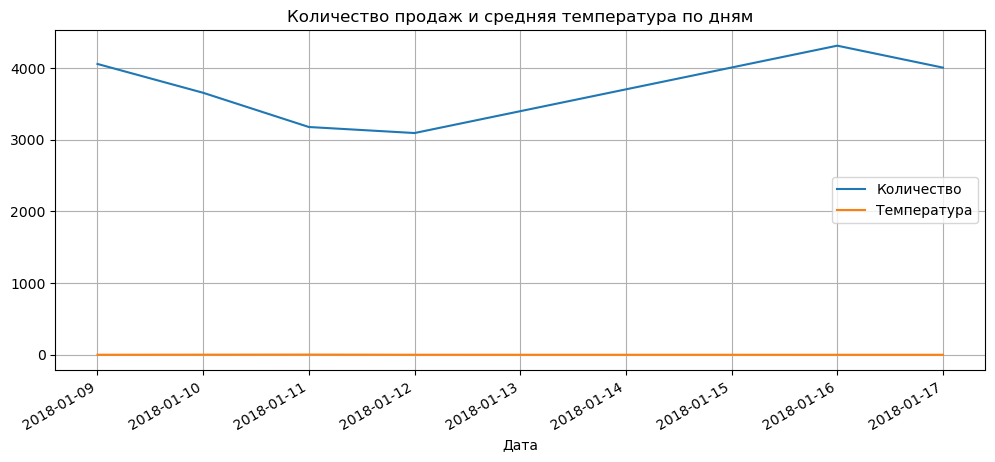

In [70]:
merged.plot(
    x='Дата',
    y=['Количество', 'Температура'],
    figsize=(12,5),
    grid=True,
    title='Количество продаж и средняя температура по дням'
)


На совмещённом графике представлена динамика количества продаж и средней
дневной температуры за период, в котором доступны данные из обоих источников.
В рассматриваемом временном интервале явной линейной зависимости между
температурой и объёмом продаж не наблюдается.
Колебания продаж происходят как при повышении, так и при понижении температуры,
что может свидетельствовать о влиянии дополнительных факторов
(день недели, акции, сезонность, поведенческие особенности клиентов).

<Axes: title={'center': 'Средняя температура по дням'}, xlabel='Дата'>

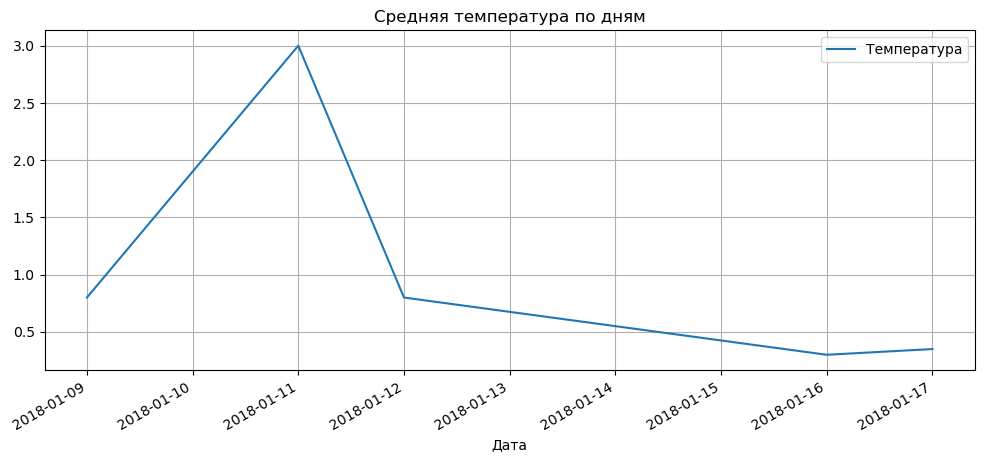

In [71]:
merged.plot(
    x='Дата',
    y='Температура',
    figsize=(12,5),
    grid=True,
    title='Средняя температура по дням'
)


График средней дневной температуры демонстрирует умеренные колебания погодных
условий без резких температурных скачков.
Температурный фон в анализируемый период относительно стабилен, что ограничивает
возможность выявления сильной корреляции с продажами на данном временном
отрезке.

По представленным графикам не наблюдается выраженной зависимости между температурой и продажами. Для более надёжных выводов требуется расширение периода наблюдений и учёт дополнительных факторов (день недели, промо-активности, сезонность).